In [ ]:
# CELL 1: Upload your dataset
from google.colab import files
uploaded = files.upload()  # Click "Choose Files" and select Churn_Modelling.csv



Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [ ]:
# CELL 2: Verify upload
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')
print(f"Dataset loaded: {df.shape}")
print(df.head())

Dataset loaded: (10000, 14)
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         9382

In [ ]:
# CELL 3: Run analysis
# Paste the entire bank_churn_analysis code here
"""
BANKING CUSTOMER CHURN ANALYSIS
EDA Capstone Project - Exploratory Data Analysis using Python

Dataset: Churn_Modelling.csv
Total Records: 10,000 customers
Objective: Identify key factors driving customer churn in banking sector
"""

# ==========================================
# SECTION 1: IMPORT LIBRARIES
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("=" * 60)
print("BANKING CUSTOMER CHURN ANALYSIS")
print("=" * 60)

# ==========================================
# SECTION 2: DATA LOADING & INITIAL EXPLORATION
# ==========================================

# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

print("\n### DATA LOADING COMPLETE ###\n")
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nFirst 5 rows:")
print(df.head())

print("\n### DATASET INFORMATION ###")
print(df.info())

print("\n### STATISTICAL SUMMARY ###")
print(df.describe())

print("\n### MISSING VALUES CHECK ###")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

print("\n### DUPLICATE RECORDS CHECK ###")
duplicates = df.duplicated().sum()
print(f"Duplicate records: {duplicates}")

print("\n### COLUMN NAMES ###")
print(df.columns.tolist())

# ==========================================
# SECTION 3: DATA CLEANING & TRANSFORMATION
# ==========================================

print("\n" + "=" * 60)
print("DATA CLEANING & TRANSFORMATION")
print("=" * 60)

# Create a copy for cleaning
df_clean = df.copy()

# Drop unnecessary columns (RowNumber, CustomerId, Surname don't add analytical value)
df_clean = df_clean.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print("\n✓ Dropped non-analytical columns: RowNumber, CustomerId, Surname")

# Create Age Groups
df_clean['AgeGroup'] = pd.cut(df_clean['Age'],
                               bins=[0, 30, 40, 50, 60, 100],
                               labels=['18-30', '31-40', '41-50', '51-60', '60+'])
print("✓ Created AgeGroup feature")

# Create Balance Categories
df_clean['BalanceCategory'] = pd.cut(df_clean['Balance'],
                                      bins=[-0.01, 0, 50000, 100000, 250000],
                                      labels=['Zero', 'Low', 'Medium', 'High'])
print("✓ Created BalanceCategory feature")

# Create Tenure Groups
df_clean['TenureGroup'] = pd.cut(df_clean['Tenure'],
                                  bins=[-1, 2, 5, 10],
                                  labels=['New (0-2 yrs)', 'Medium (3-5 yrs)', 'Long (6-10 yrs)'])
print("✓ Created TenureGroup feature")

# Create Credit Score Categories
df_clean['CreditScoreCategory'] = pd.cut(df_clean['CreditScore'],
                                          bins=[0, 580, 670, 740, 850],
                                          labels=['Poor', 'Fair', 'Good', 'Excellent'])
print("✓ Created CreditScoreCategory feature")

print(f"\n✓ Cleaned dataset shape: {df_clean.shape}")
print("\n### CLEANED DATASET PREVIEW ###")
print(df_clean.head())

# Save cleaned data
df_clean.to_csv('bank_churn_cleaned.csv', index=False)
print("\n✓ Cleaned dataset saved as 'bank_churn_cleaned.csv'")

# ==========================================
# SECTION 4: UNIVARIATE ANALYSIS
# ==========================================

print("\n" + "=" * 60)
print("UNIVARIATE ANALYSIS")
print("=" * 60)

# Target Variable Analysis
print("\n### CHURN DISTRIBUTION ###")
churn_counts = df_clean['Exited'].value_counts()
churn_rate = (df_clean['Exited'].sum() / len(df_clean)) * 100
print(f"Retained Customers: {churn_counts[0]} ({100-churn_rate:.2f}%)")
print(f"Churned Customers: {churn_counts[1]} ({churn_rate:.2f}%)")
print(f"\n⚠️ Overall Churn Rate: {churn_rate:.2f}%")

# Numerical Features Summary
print("\n### NUMERICAL FEATURES SUMMARY ###")
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Mean: {df_clean[col].mean():.2f}")
    print(f"  Median: {df_clean[col].median():.2f}")
    print(f"  Std Dev: {df_clean[col].std():.2f}")
    print(f"  Min: {df_clean[col].min():.2f}, Max: {df_clean[col].max():.2f}")

# Categorical Features Distribution
print("\n### CATEGORICAL FEATURES DISTRIBUTION ###")
categorical_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_clean[col].value_counts())
    print(f"Percentages:\n{df_clean[col].value_counts(normalize=True) * 100}")

# ==========================================
# SECTION 5: BIVARIATE ANALYSIS
# ==========================================

print("\n" + "=" * 60)
print("BIVARIATE ANALYSIS - CHURN vs FEATURES")
print("=" * 60)

# Geography vs Churn
print("\n### CHURN BY GEOGRAPHY ###")
geo_churn = df_clean.groupby('Geography')['Exited'].agg(['sum', 'count', 'mean'])
geo_churn.columns = ['Churned', 'Total', 'ChurnRate']
geo_churn['ChurnRate'] = geo_churn['ChurnRate'] * 100
print(geo_churn)
print(f"\n🔍 Key Insight: {geo_churn['ChurnRate'].idxmax()} has the highest churn rate at {geo_churn['ChurnRate'].max():.2f}%")

# Gender vs Churn
print("\n### CHURN BY GENDER ###")
gender_churn = df_clean.groupby('Gender')['Exited'].agg(['sum', 'count', 'mean'])
gender_churn.columns = ['Churned', 'Total', 'ChurnRate']
gender_churn['ChurnRate'] = gender_churn['ChurnRate'] * 100
print(gender_churn)

# Age Group vs Churn
print("\n### CHURN BY AGE GROUP ###")
age_churn = df_clean.groupby('AgeGroup')['Exited'].agg(['sum', 'count', 'mean'])
age_churn.columns = ['Churned', 'Total', 'ChurnRate']
age_churn['ChurnRate'] = age_churn['ChurnRate'] * 100
print(age_churn)
print(f"\n🔍 Key Insight: {age_churn['ChurnRate'].idxmax()} age group has highest churn at {age_churn['ChurnRate'].max():.2f}%")

# Number of Products vs Churn
print("\n### CHURN BY NUMBER OF PRODUCTS ###")
prod_churn = df_clean.groupby('NumOfProducts')['Exited'].agg(['sum', 'count', 'mean'])
prod_churn.columns = ['Churned', 'Total', 'ChurnRate']
prod_churn['ChurnRate'] = prod_churn['ChurnRate'] * 100
print(prod_churn)
print(f"\n🔍 Key Insight: Customers with {prod_churn['ChurnRate'].idxmax()} product(s) have {prod_churn['ChurnRate'].max():.2f}% churn rate")

# Active Membership vs Churn
print("\n### CHURN BY ACTIVE MEMBERSHIP STATUS ###")
active_churn = df_clean.groupby('IsActiveMember')['Exited'].agg(['sum', 'count', 'mean'])
active_churn.index = ['Inactive', 'Active']
active_churn.columns = ['Churned', 'Total', 'ChurnRate']
active_churn['ChurnRate'] = active_churn['ChurnRate'] * 100
print(active_churn)
churn_diff = active_churn.loc['Inactive', 'ChurnRate'] - active_churn.loc['Active', 'ChurnRate']
print(f"\n🔍 Key Insight: Inactive members have {churn_diff:.2f}% higher churn rate than active members")

# Credit Card Ownership vs Churn
print("\n### CHURN BY CREDIT CARD OWNERSHIP ###")
card_churn = df_clean.groupby('HasCrCard')['Exited'].agg(['sum', 'count', 'mean'])
card_churn.index = ['No Card', 'Has Card']
card_churn.columns = ['Churned', 'Total', 'ChurnRate']
card_churn['ChurnRate'] = card_churn['ChurnRate'] * 100
print(card_churn)

# Tenure Group vs Churn
print("\n### CHURN BY TENURE GROUP ###")
tenure_churn = df_clean.groupby('TenureGroup')['Exited'].agg(['sum', 'count', 'mean'])
tenure_churn.columns = ['Churned', 'Total', 'ChurnRate']
tenure_churn['ChurnRate'] = tenure_churn['ChurnRate'] * 100
print(tenure_churn)

# Balance vs Churn
print("\n### CHURN BY BALANCE CATEGORY ###")
balance_churn = df_clean.groupby('BalanceCategory')['Exited'].agg(['sum', 'count', 'mean'])
balance_churn.columns = ['Churned', 'Total', 'ChurnRate']
balance_churn['ChurnRate'] = balance_churn['ChurnRate'] * 100
print(balance_churn)

# Statistical comparison of numerical features
print("\n### NUMERICAL FEATURES: CHURNED vs RETAINED ###")
for col in numerical_cols:
    churned_mean = df_clean[df_clean['Exited']==1][col].mean()
    retained_mean = df_clean[df_clean['Exited']==0][col].mean()
    print(f"\n{col}:")
    print(f"  Churned Customers: {churned_mean:.2f}")
    print(f"  Retained Customers: {retained_mean:.2f}")
    print(f"  Difference: {churned_mean - retained_mean:.2f}")

# ==========================================
# SECTION 6: MULTIVARIATE ANALYSIS
# ==========================================

print("\n" + "=" * 60)
print("MULTIVARIATE ANALYSIS")
print("=" * 60)

# Correlation Analysis
print("\n### CORRELATION MATRIX ###")
correlation_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                    'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
correlation_matrix = df_clean[correlation_cols].corr()
print("\nCorrelation with Churn (Exited):")
print(correlation_matrix['Exited'].sort_values(ascending=False))

# Geography + Gender vs Churn
print("\n### CHURN BY GEOGRAPHY & GENDER ###")
geo_gender_churn = df_clean.groupby(['Geography', 'Gender'])['Exited'].agg(['count', 'sum', 'mean'])
geo_gender_churn.columns = ['Total', 'Churned', 'ChurnRate']
geo_gender_churn['ChurnRate'] = geo_gender_churn['ChurnRate'] * 100
print(geo_gender_churn)

# Age Group + Products vs Churn
print("\n### CHURN BY AGE GROUP & NUMBER OF PRODUCTS ###")
age_prod_churn = df_clean.groupby(['AgeGroup', 'NumOfProducts'])['Exited'].mean() * 100
print(age_prod_churn.unstack().round(2))

# Active Membership + Products vs Churn
print("\n### CHURN BY ACTIVE STATUS & NUMBER OF PRODUCTS ###")
active_prod_churn = df_clean.groupby(['IsActiveMember', 'NumOfProducts'])['Exited'].mean() * 100
status_mapping = {0: 'Inactive', 1: 'Active'}
active_prod_churn = active_prod_churn.rename(index=status_mapping, level='IsActiveMember')
print(active_prod_churn.unstack().round(2))

# High-Risk Customer Profile
print("\n### HIGH-RISK CUSTOMER PROFILE ###")
high_risk = df_clean[(df_clean['Exited'] == 1)]
print(f"Total High-Risk Customers: {len(high_risk)}")
print("\nCharacteristics of Churned Customers:")
print(f"  - Most common country: {high_risk['Geography'].mode()[0]}")
print(f"  - Most common gender: {high_risk['Gender'].mode()[0]}")
print(f"  - Average age: {high_risk['Age'].mean():.1f} years")
print(f"  - Most common product count: {high_risk['NumOfProducts'].mode()[0]}")
print(f"  - % Inactive members: {(1-high_risk['IsActiveMember'].mean())*100:.1f}%")
print(f"  - Average balance: ${high_risk['Balance'].mean():.2f}")

# Low-Risk Customer Profile
print("\n### LOW-RISK CUSTOMER PROFILE ###")
low_risk = df_clean[(df_clean['Exited'] == 0)]
print(f"Total Low-Risk Customers: {len(low_risk)}")
print("\nCharacteristics of Retained Customers:")
print(f"  - Most common country: {low_risk['Geography'].mode()[0]}")
print(f"  - Most common gender: {low_risk['Gender'].mode()[0]}")
print(f"  - Average age: {low_risk['Age'].mean():.1f} years")
print(f"  - Most common product count: {low_risk['NumOfProducts'].mode()[0]}")
print(f"  - % Active members: {low_risk['IsActiveMember'].mean()*100:.1f}%")
print(f"  - Average balance: ${low_risk['Balance'].mean():.2f}")

# ==========================================
# SECTION 7: KEY INSIGHTS SUMMARY
# ==========================================

print("\n" + "=" * 60)
print("KEY INSIGHTS & FINDINGS")
print("=" * 60)

print("\n🎯 TOP 5 KEY FINDINGS:")
print("\n1. OVERALL CHURN RATE")
print(f"   - {churn_rate:.2f}% of customers have churned")
print(f"   - {churn_counts[1]} out of {len(df_clean)} customers exited")

print("\n2. GEOGRAPHIC DISPARITY")
print(f"   - Germany has the highest churn rate: {geo_churn.loc['Germany', 'ChurnRate']:.2f}%")
print(f"   - France has the lowest churn rate: {geo_churn.loc['France', 'ChurnRate']:.2f}%")
print(f"   - Difference: {geo_churn.loc['Germany', 'ChurnRate'] - geo_churn.loc['France', 'ChurnRate']:.2f} percentage points")

print("\n3. PRODUCT HOLDINGS CRITICAL")
print(f"   - Single product customers: {prod_churn.loc[1, 'ChurnRate']:.2f}% churn rate")
print(f"   - Two product customers: {prod_churn.loc[2, 'ChurnRate']:.2f}% churn rate")
print(f"   - Multi-product engagement reduces churn significantly")

print("\n4. ACTIVITY STATUS MATTERS")
print(f"   - Inactive members: {active_churn.loc['Inactive', 'ChurnRate']:.2f}% churn rate")
print(f"   - Active members: {active_churn.loc['Active', 'ChurnRate']:.2f}% churn rate")
print(f"   - Activity reduces churn by {churn_diff:.2f} percentage points")

print("\n5. AGE FACTOR")
print(f"   - Older customers (51+) show significantly higher churn rates")
print(f"   - 51-60 age group: {age_churn.loc['51-60', 'ChurnRate']:.2f}% churn")
print(f"   - 60+ age group: {age_churn.loc['60+', 'ChurnRate']:.2f}% churn")

print("\n💡 ADDITIONAL OBSERVATIONS:")
print("   - Balance levels show interesting patterns with churn")
print("   - Gender differences exist but are less pronounced than other factors")
print("   - Credit score has weak correlation with churn")
print("   - Tenure doesn't strongly predict churn")

# ==========================================
# SECTION 8: RECOMMENDATIONS
# ==========================================

print("\n" + "=" * 60)
print("STRATEGIC RECOMMENDATIONS")
print("=" * 60)

print("\n📌 RECOMMENDATION 1: MULTI-PRODUCT CROSS-SELL PROGRAM")
print("   Goal: Reduce single-product customer churn")
print("   Action: Develop targeted campaigns to encourage customers to adopt")
print("           a second product (savings + credit card, checking + investment)")
print("   Expected Impact: Could reduce churn by 15-20% among single-product holders")

print("\n📌 RECOMMENDATION 2: RE-ENGAGEMENT CAMPAIGNS FOR INACTIVE MEMBERS")
print("   Goal: Convert inactive to active members")
print("   Action: Personalized email/SMS campaigns, special offers for")
print("           transaction activity, mobile app engagement programs")
print("   Expected Impact: Reducing inactivity could lower churn by 12-15%")

print("\n📌 RECOMMENDATION 3: GERMANY-SPECIFIC RETENTION STRATEGY")
print("   Goal: Address high churn in German market")
print("   Action: Market research to understand German customer pain points,")
print("           localized customer service, competitive analysis")
print("   Expected Impact: Bringing Germany churn to France levels would save ~800 customers")

print("\n📌 RECOMMENDATION 4: SENIOR CUSTOMER LOYALTY PROGRAM")
print("   Goal: Retain customers 50+ years old")
print("   Action: Dedicated relationship managers, simplified products,")
print("           senior-friendly digital interfaces, retirement planning services")
print("   Expected Impact: Could reduce senior churn by 10-15%")

print("\n📌 RECOMMENDATION 5: PREDICTIVE CHURN SCORING")
print("   Goal: Identify at-risk customers before they churn")
print("   Action: Build ML model using identified features, proactive outreach")
print("           to high-risk customers, retention incentives")
print("   Expected Impact: Early intervention could prevent 20-30% of predicted churns")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE!")
print("=" * 60)
print("\nNext Steps:")
print("1. Create visualizations using matplotlib/seaborn")
print("2. Build interactive dashboard with Streamlit")
print("3. Prepare presentation deck with key findings")
print("4. Document methodology and insights")
print("\n✓ Cleaned dataset saved: bank_churn_cleaned.csv")
print("✓ Ready for visualization and dashboard creation")

BANKING CUSTOMER CHURN ANALYSIS

### DATA LOADING COMPLETE ###

Dataset Shape: 10000 rows, 14 columns

First 5 rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101

Creating comprehensive visualizations for Banking Churn Analysis...


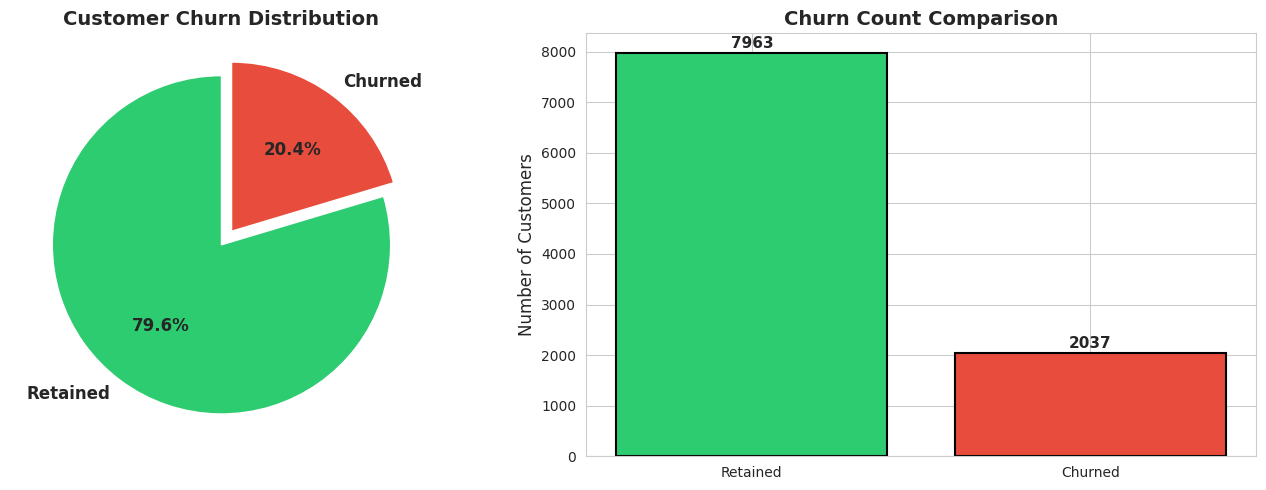

✓ Visualization 1 saved: viz_1_churn_overview.png


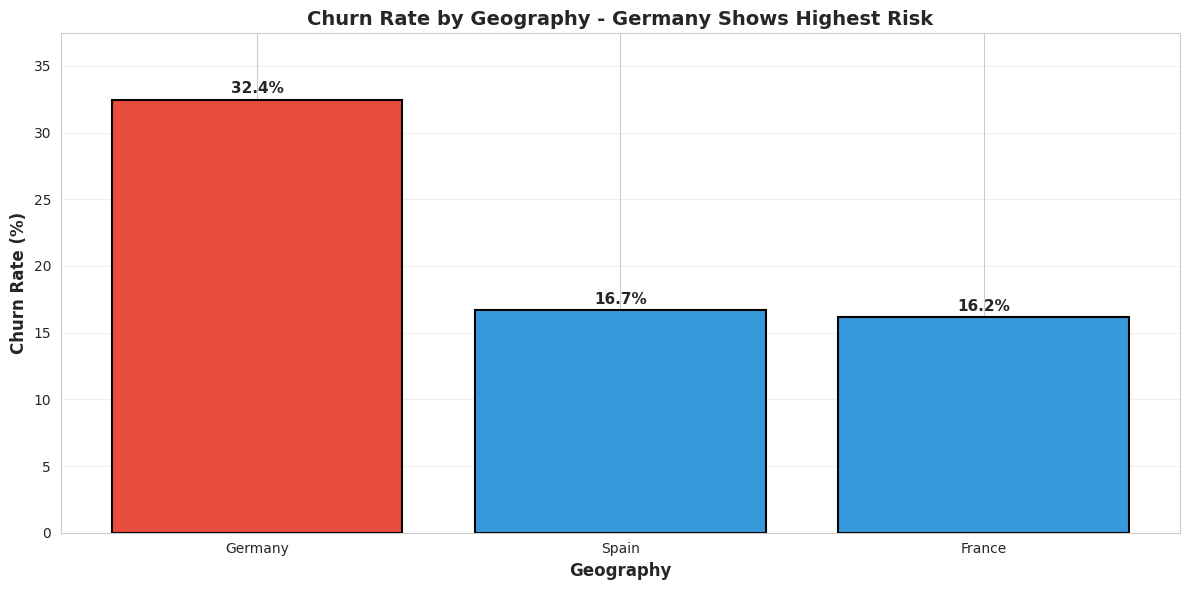

✓ Visualization 2 saved: viz_2_churn_by_geography.png


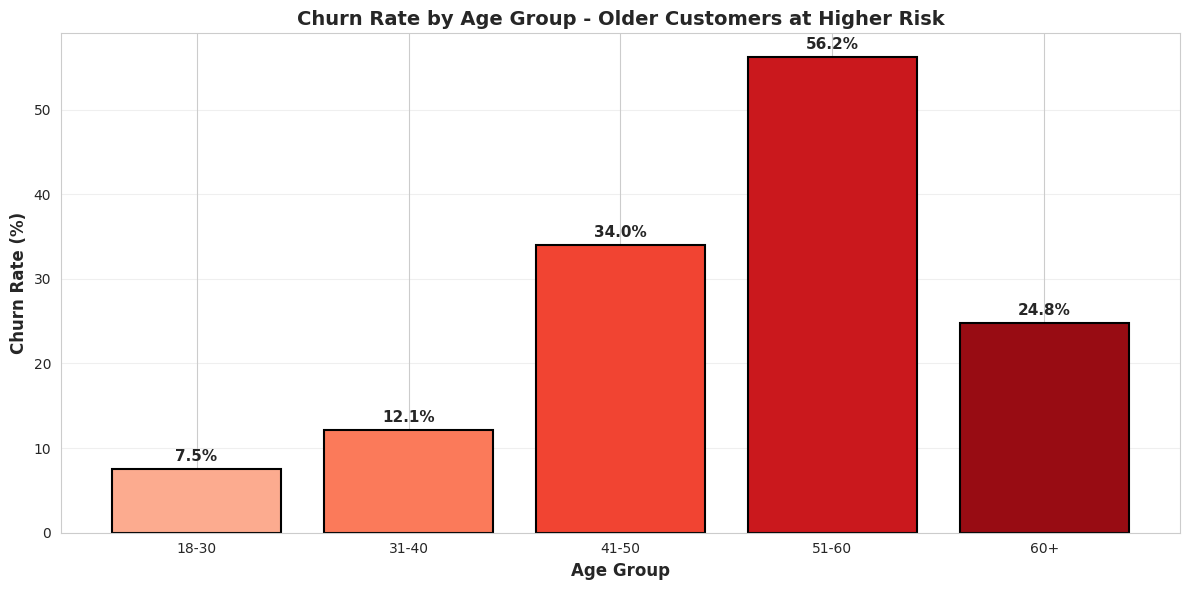

✓ Visualization 3 saved: viz_3_churn_by_age.png


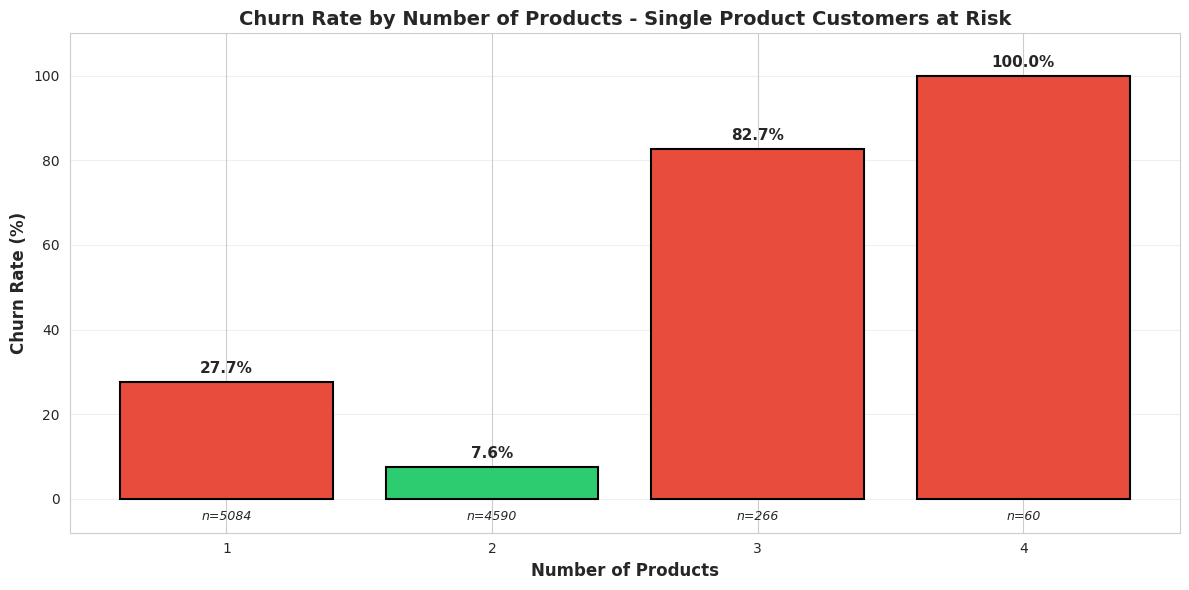

✓ Visualization 4 saved: viz_4_churn_by_products.png


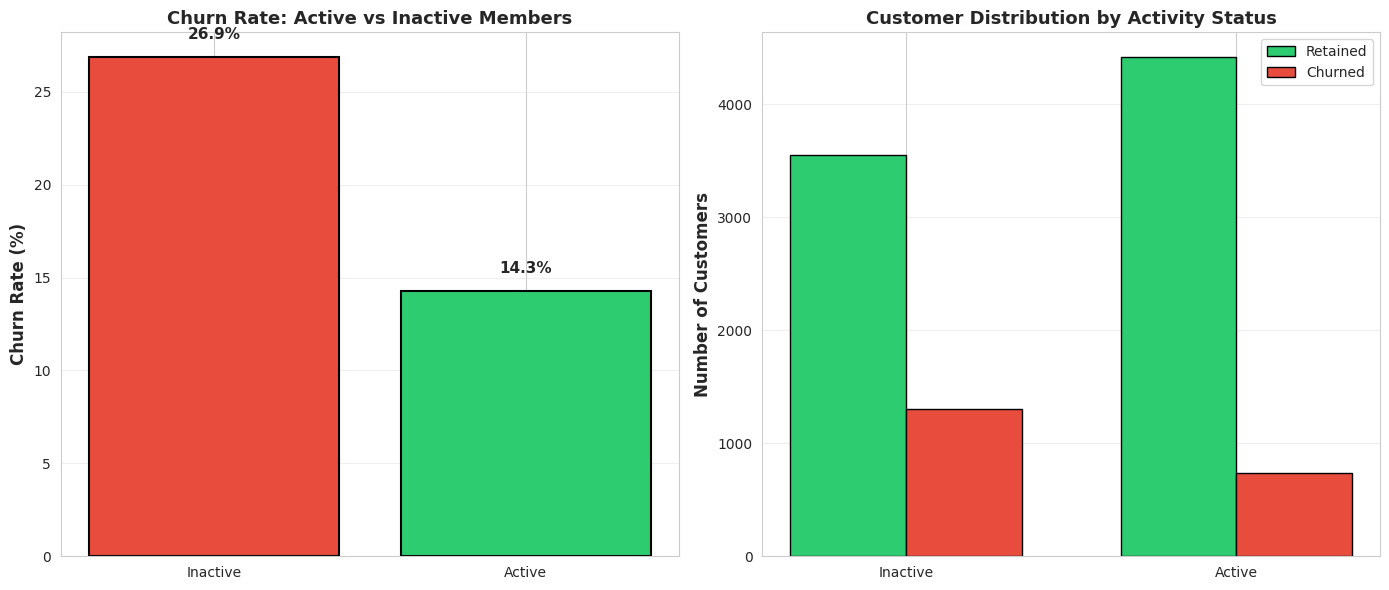

✓ Visualization 5 saved: viz_5_active_vs_inactive.png


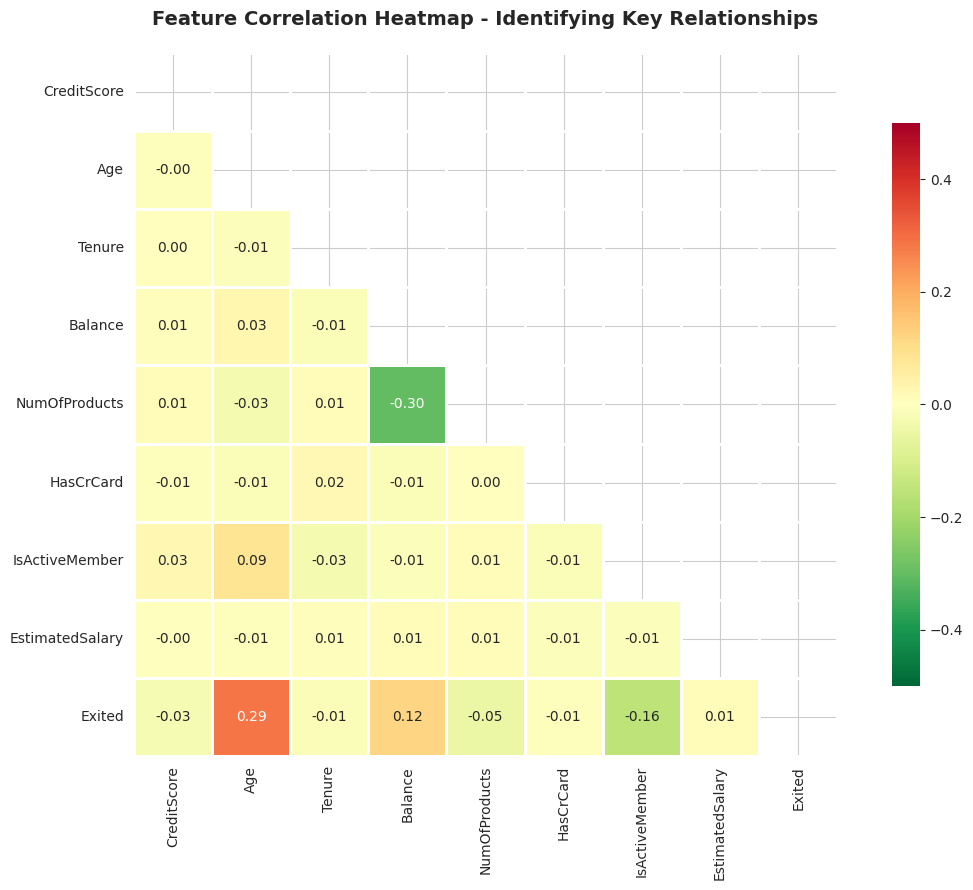

✓ Visualization 6 saved: viz_6_correlation_heatmap.png


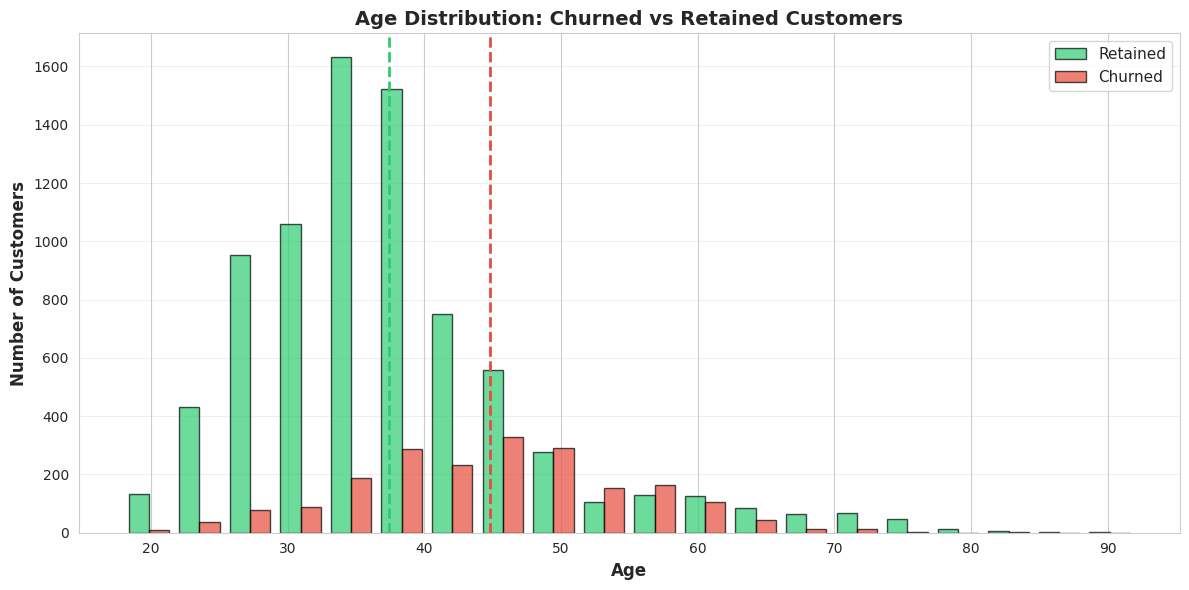

✓ Visualization 7 saved: viz_7_age_distribution.png


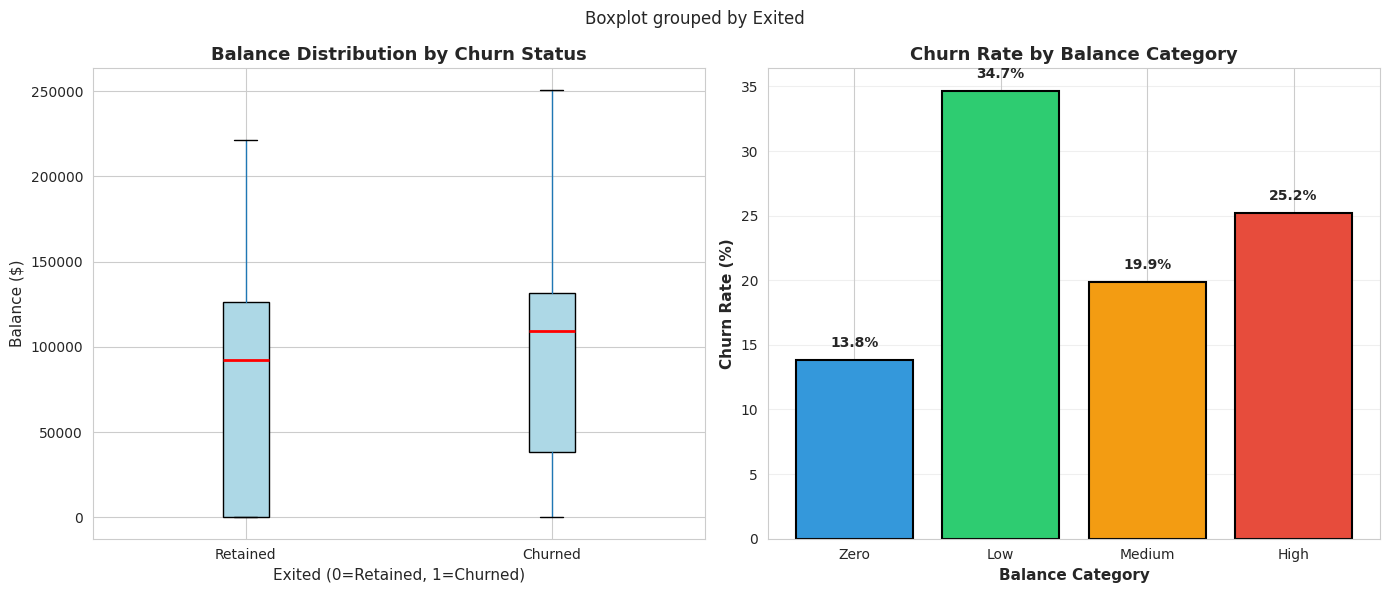

✓ Visualization 8 saved: viz_8_balance_analysis.png


<Figure size 1200x600 with 0 Axes>

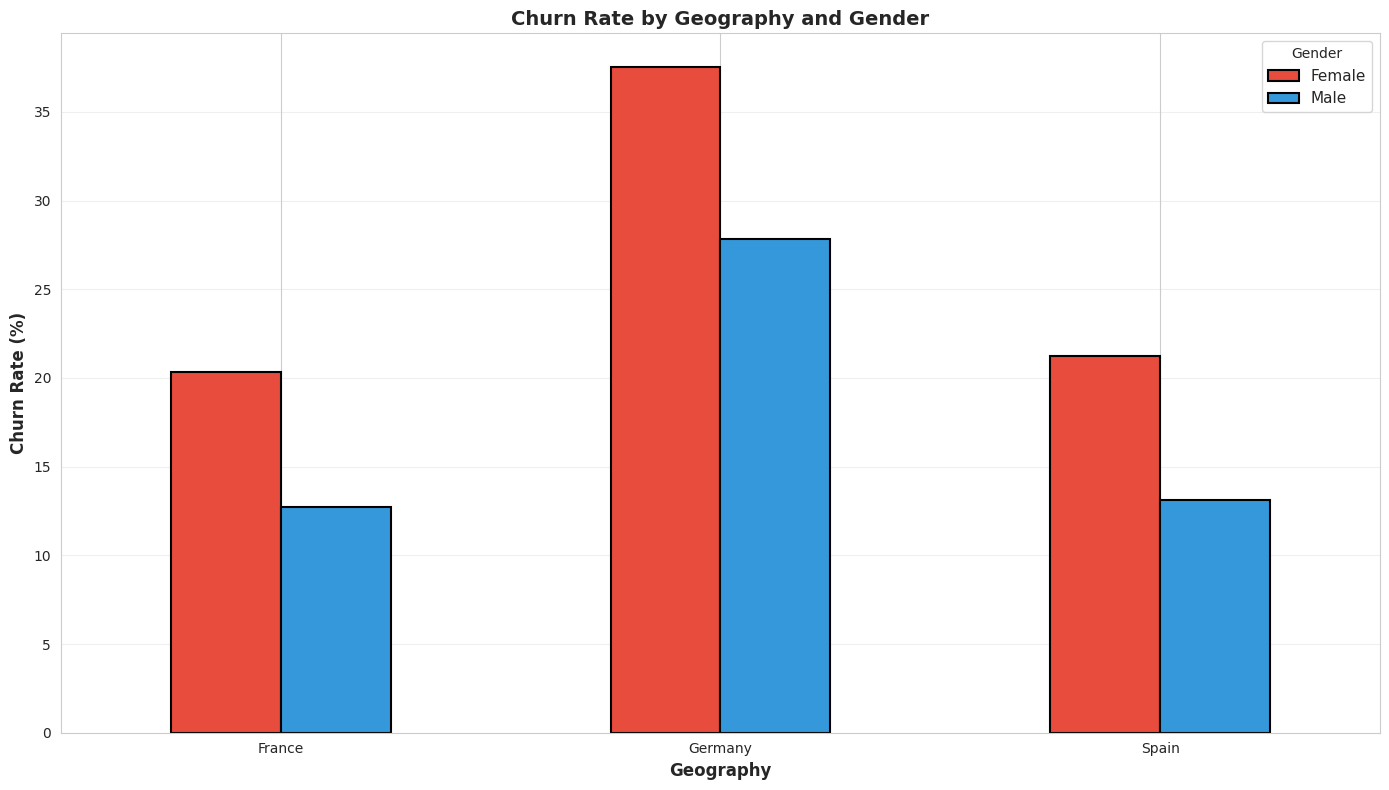

✓ Visualization 9 saved: viz_9_geography_gender.png


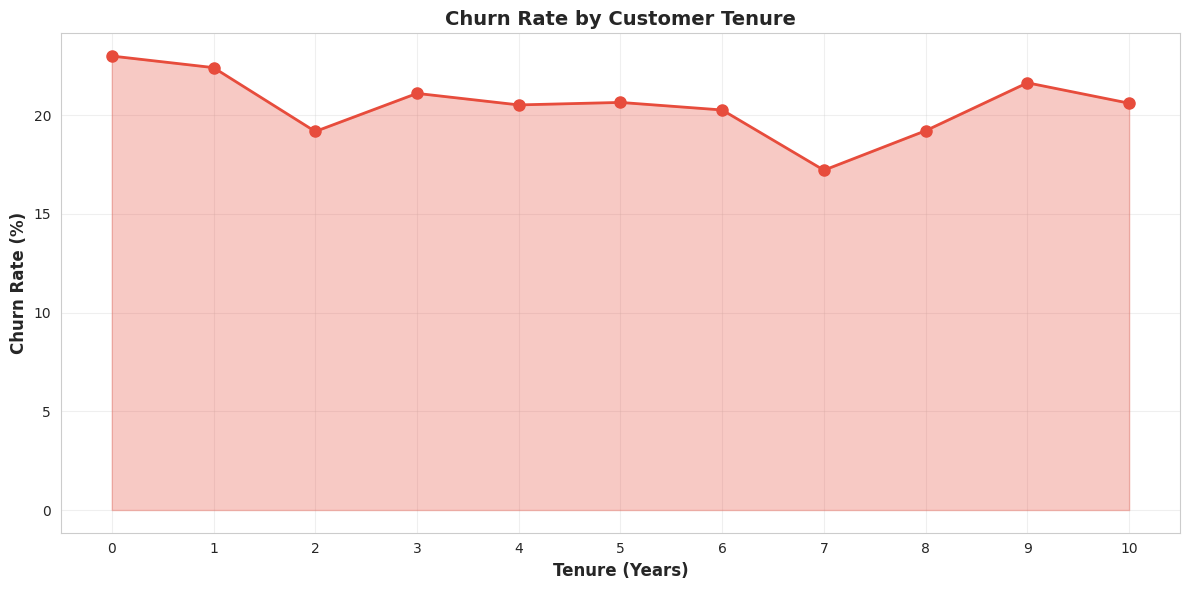

✓ Visualization 10 saved: viz_10_tenure_analysis.png


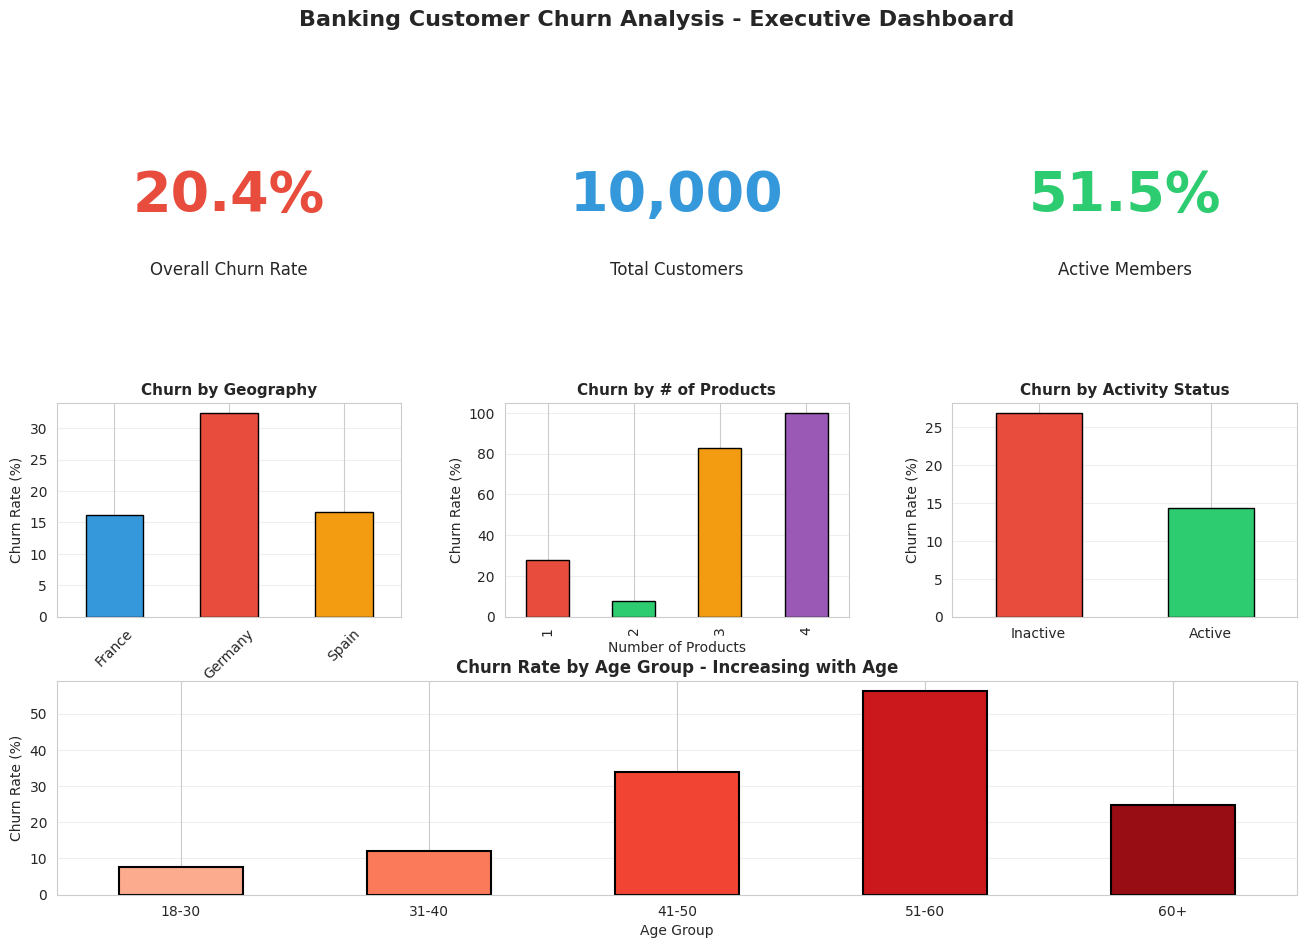

✓ Visualization 11 saved: viz_11_executive_dashboard.png

ALL VISUALIZATIONS CREATED SUCCESSFULLY!

📊 Generated Files:
  1. viz_1_churn_overview.png
  2. viz_2_churn_by_geography.png
  3. viz_3_churn_by_age.png
  4. viz_4_churn_by_products.png ⭐ KEY INSIGHT
  5. viz_5_active_vs_inactive.png ⭐ KEY INSIGHT
  6. viz_6_correlation_heatmap.png
  7. viz_7_age_distribution.png
  8. viz_8_balance_analysis.png
  9. viz_9_geography_gender.png
  10. viz_10_tenure_analysis.png
  11. viz_11_executive_dashboard.png ⭐ USE FOR PRESENTATION

✓ All visualizations ready for inclusion in report and presentation!


In [ ]:
# CELL 4: Run visualizations
# Paste the entire bank_churn_visualizations code here
"""
BANKING CUSTOMER CHURN ANALYSIS - VISUALIZATIONS
Complete visualization suite for EDA presentation

Run this after the main analysis notebook
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

# Load cleaned data
df = pd.read_csv('bank_churn_cleaned.csv')

print("Creating comprehensive visualizations for Banking Churn Analysis...")

# ==========================================
# VISUALIZATION 1: CHURN OVERVIEW
# ==========================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn Distribution - Pie Chart
churn_counts = df['Exited'].value_counts()
colors = ['#2ecc71', '#e74c3c']
labels = ['Retained', 'Churned']
explode = (0, 0.1)

axes[0].pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors,
            explode=explode, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
axes[0].set_title('Customer Churn Distribution', fontsize=14, weight='bold')

# Churn Count - Bar Chart
axes[1].bar(labels, churn_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_title('Churn Count Comparison', fontsize=14, weight='bold')
for i, v in enumerate(churn_counts.values):
    axes[1].text(i, v + 100, str(v), ha='center', fontsize=11, weight='bold')

plt.tight_layout()
plt.savefig('viz_1_churn_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 1 saved: viz_1_churn_overview.png")

# ==========================================
# VISUALIZATION 2: CHURN BY GEOGRAPHY
# ==========================================

plt.figure(figsize=(12, 6))

geo_churn = df.groupby('Geography')['Exited'].agg(['sum', 'count'])
geo_churn['churn_rate'] = (geo_churn['sum'] / geo_churn['count']) * 100
geo_churn = geo_churn.sort_values('churn_rate', ascending=False)

colors_geo = ['#e74c3c' if x == geo_churn['churn_rate'].max() else '#3498db'
              for x in geo_churn['churn_rate']]

bars = plt.bar(geo_churn.index, geo_churn['churn_rate'], color=colors_geo,
               edgecolor='black', linewidth=1.5)

plt.ylabel('Churn Rate (%)', fontsize=12, weight='bold')
plt.xlabel('Geography', fontsize=12, weight='bold')
plt.title('Churn Rate by Geography - Germany Shows Highest Risk', fontsize=14, weight='bold')
plt.ylim(0, max(geo_churn['churn_rate']) + 5)

for i, (idx, row) in enumerate(geo_churn.iterrows()):
    plt.text(i, row['churn_rate'] + 0.5, f"{row['churn_rate']:.1f}%",
             ha='center', fontsize=11, weight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('viz_2_churn_by_geography.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 2 saved: viz_2_churn_by_geography.png")

# ==========================================
# VISUALIZATION 3: CHURN BY AGE GROUP
# ==========================================

plt.figure(figsize=(12, 6))

age_order = ['18-30', '31-40', '41-50', '51-60', '60+']
age_churn = df.groupby('AgeGroup')['Exited'].agg(['sum', 'count'])
age_churn['churn_rate'] = (age_churn['sum'] / age_churn['count']) * 100
age_churn = age_churn.reindex(age_order)

colors_age = plt.cm.Reds(np.linspace(0.3, 0.9, len(age_churn)))

bars = plt.bar(age_churn.index, age_churn['churn_rate'], color=colors_age,
               edgecolor='black', linewidth=1.5)

plt.ylabel('Churn Rate (%)', fontsize=12, weight='bold')
plt.xlabel('Age Group', fontsize=12, weight='bold')
plt.title('Churn Rate by Age Group - Older Customers at Higher Risk', fontsize=14, weight='bold')

for i, (idx, row) in enumerate(age_churn.iterrows()):
    plt.text(i, row['churn_rate'] + 1, f"{row['churn_rate']:.1f}%",
             ha='center', fontsize=11, weight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('viz_3_churn_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 3 saved: viz_3_churn_by_age.png")

# ==========================================
# VISUALIZATION 4: CHURN BY NUMBER OF PRODUCTS (CRITICAL)
# ==========================================

plt.figure(figsize=(12, 6))

prod_churn = df.groupby('NumOfProducts')['Exited'].agg(['sum', 'count'])
prod_churn['churn_rate'] = (prod_churn['sum'] / prod_churn['count']) * 100

colors_prod = ['#e74c3c' if x > 20 else '#2ecc71' if x < 10 else '#f39c12'
               for x in prod_churn['churn_rate']]

bars = plt.bar(prod_churn.index, prod_churn['churn_rate'], color=colors_prod,
               edgecolor='black', linewidth=1.5)

plt.ylabel('Churn Rate (%)', fontsize=12, weight='bold')
plt.xlabel('Number of Products', fontsize=12, weight='bold')
plt.title('Churn Rate by Number of Products - Single Product Customers at Risk',
          fontsize=14, weight='bold')
plt.xticks(prod_churn.index)

for i, (idx, row) in enumerate(prod_churn.iterrows()):
    plt.text(idx, row['churn_rate'] + 2, f"{row['churn_rate']:.1f}%",
             ha='center', fontsize=11, weight='bold')
    plt.text(idx, -5, f"n={int(row['count'])}", ha='center', fontsize=9, style='italic')

plt.ylim(-8, max(prod_churn['churn_rate']) + 10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('viz_4_churn_by_products.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 4 saved: viz_4_churn_by_products.png")

# ==========================================
# VISUALIZATION 5: ACTIVE VS INACTIVE MEMBERS
# ==========================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

active_churn = df.groupby('IsActiveMember')['Exited'].agg(['sum', 'count'])
active_churn['churn_rate'] = (active_churn['sum'] / active_churn['count']) * 100
active_churn.index = ['Inactive', 'Active']

colors_active = ['#e74c3c', '#2ecc71']

# Churn Rate Comparison
bars1 = axes[0].bar(active_churn.index, active_churn['churn_rate'],
                    color=colors_active, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Churn Rate (%)', fontsize=12, weight='bold')
axes[0].set_title('Churn Rate: Active vs Inactive Members', fontsize=13, weight='bold')
axes[0].grid(axis='y', alpha=0.3)

for i, (idx, row) in enumerate(active_churn.iterrows()):
    axes[0].text(i, row['churn_rate'] + 1, f"{row['churn_rate']:.1f}%",
                 ha='center', fontsize=11, weight='bold')

# Grouped Bar Chart
active_data = df.groupby(['IsActiveMember', 'Exited']).size().unstack()
active_data.index = ['Inactive', 'Active']
active_data.columns = ['Retained', 'Churned']

x = np.arange(len(active_data.index))
width = 0.35

bars2 = axes[1].bar(x - width/2, active_data['Retained'], width,
                    label='Retained', color='#2ecc71', edgecolor='black')
bars3 = axes[1].bar(x + width/2, active_data['Churned'], width,
                    label='Churned', color='#e74c3c', edgecolor='black')

axes[1].set_ylabel('Number of Customers', fontsize=12, weight='bold')
axes[1].set_title('Customer Distribution by Activity Status', fontsize=13, weight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(active_data.index)
axes[1].legend(fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('viz_5_active_vs_inactive.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 5 saved: viz_5_active_vs_inactive.png")

# ==========================================
# VISUALIZATION 6: CORRELATION HEATMAP
# ==========================================

plt.figure(figsize=(12, 9))

corr_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
             'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
correlation = df[corr_cols].corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn_r',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-0.5, vmax=0.5)

plt.title('Feature Correlation Heatmap - Identifying Key Relationships',
          fontsize=14, weight='bold', pad=20)
plt.tight_layout()
plt.savefig('viz_6_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 6 saved: viz_6_correlation_heatmap.png")

# ==========================================
# VISUALIZATION 7: AGE DISTRIBUTION BY CHURN STATUS
# ==========================================

plt.figure(figsize=(12, 6))

churned = df[df['Exited'] == 1]['Age']
retained = df[df['Exited'] == 0]['Age']

plt.hist([retained, churned], bins=20, label=['Retained', 'Churned'],
         color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')

plt.xlabel('Age', fontsize=12, weight='bold')
plt.ylabel('Number of Customers', fontsize=12, weight='bold')
plt.title('Age Distribution: Churned vs Retained Customers', fontsize=14, weight='bold')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

plt.axvline(churned.mean(), color='#e74c3c', linestyle='--', linewidth=2,
            label=f'Churned Mean: {churned.mean():.1f}')
plt.axvline(retained.mean(), color='#2ecc71', linestyle='--', linewidth=2,
            label=f'Retained Mean: {retained.mean():.1f}')

plt.tight_layout()
plt.savefig('viz_7_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 7 saved: viz_7_age_distribution.png")

# ==========================================
# VISUALIZATION 8: BALANCE DISTRIBUTION BY CHURN
# ==========================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box Plot
df.boxplot(column='Balance', by='Exited', ax=axes[0], patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           medianprops=dict(color='red', linewidth=2))
axes[0].set_title('Balance Distribution by Churn Status', fontsize=13, weight='bold')
axes[0].set_xlabel('Exited (0=Retained, 1=Churned)', fontsize=11)
axes[0].set_ylabel('Balance ($)', fontsize=11)
plt.sca(axes[0])
plt.xticks([1, 2], ['Retained', 'Churned'])

# Churn by Balance Category
balance_churn = df.groupby('BalanceCategory')['Exited'].agg(['sum', 'count'])
balance_churn['churn_rate'] = (balance_churn['sum'] / balance_churn['count']) * 100
balance_order = ['Zero', 'Low', 'Medium', 'High']
balance_churn = balance_churn.reindex(balance_order)

colors_bal = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']
bars = axes[1].bar(balance_churn.index, balance_churn['churn_rate'],
                   color=colors_bal, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Churn Rate (%)', fontsize=11, weight='bold')
axes[1].set_xlabel('Balance Category', fontsize=11, weight='bold')
axes[1].set_title('Churn Rate by Balance Category', fontsize=13, weight='bold')
axes[1].grid(axis='y', alpha=0.3)

for i, (idx, row) in enumerate(balance_churn.iterrows()):
    axes[1].text(i, row['churn_rate'] + 1, f"{row['churn_rate']:.1f}%",
                 ha='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.savefig('viz_8_balance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 8 saved: viz_8_balance_analysis.png")

# ==========================================
# VISUALIZATION 9: GENDER & GEOGRAPHY INTERACTION
# ==========================================

plt.figure(figsize=(12, 6))

geo_gender = df.groupby(['Geography', 'Gender'])['Exited'].agg(['sum', 'count'])
geo_gender['churn_rate'] = (geo_gender['sum'] / geo_gender['count']) * 100
geo_gender_pivot = geo_gender['churn_rate'].unstack()

geo_gender_pivot.plot(kind='bar', color=['#e74c3c', '#3498db'],
                      edgecolor='black', linewidth=1.5)

plt.ylabel('Churn Rate (%)', fontsize=12, weight='bold')
plt.xlabel('Geography', fontsize=12, weight='bold')
plt.title('Churn Rate by Geography and Gender', fontsize=14, weight='bold')
plt.legend(title='Gender', fontsize=11)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('viz_9_geography_gender.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 9 saved: viz_9_geography_gender.png")

# ==========================================
# VISUALIZATION 10: TENURE ANALYSIS
# ==========================================

plt.figure(figsize=(12, 6))

tenure_churn = df.groupby('Tenure')['Exited'].agg(['sum', 'count'])
tenure_churn['churn_rate'] = (tenure_churn['sum'] / tenure_churn['count']) * 100

plt.plot(tenure_churn.index, tenure_churn['churn_rate'], marker='o',
         linewidth=2, markersize=8, color='#e74c3c')
plt.fill_between(tenure_churn.index, tenure_churn['churn_rate'], alpha=0.3, color='#e74c3c')

plt.xlabel('Tenure (Years)', fontsize=12, weight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12, weight='bold')
plt.title('Churn Rate by Customer Tenure', fontsize=14, weight='bold')
plt.xticks(tenure_churn.index)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('viz_10_tenure_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 10 saved: viz_10_tenure_analysis.png")

# ==========================================
# VISUALIZATION 11: COMPREHENSIVE DASHBOARD SUMMARY
# ==========================================

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# KPI Cards (Text)
ax1 = fig.add_subplot(gs[0, 0])
ax1.axis('off')
churn_rate = (df['Exited'].sum() / len(df)) * 100
ax1.text(0.5, 0.6, f"{churn_rate:.1f}%", ha='center', fontsize=40, weight='bold', color='#e74c3c')
ax1.text(0.5, 0.3, "Overall Churn Rate", ha='center', fontsize=12)
ax1.set_facecolor('#f8f9fa')

ax2 = fig.add_subplot(gs[0, 1])
ax2.axis('off')
ax2.text(0.5, 0.6, f"{len(df):,}", ha='center', fontsize=40, weight='bold', color='#3498db')
ax2.text(0.5, 0.3, "Total Customers", ha='center', fontsize=12)
ax2.set_facecolor('#f8f9fa')

ax3 = fig.add_subplot(gs[0, 2])
ax3.axis('off')
active_pct = (df['IsActiveMember'].sum() / len(df)) * 100
ax3.text(0.5, 0.6, f"{active_pct:.1f}%", ha='center', fontsize=40, weight='bold', color='#2ecc71')
ax3.text(0.5, 0.3, "Active Members", ha='center', fontsize=12)
ax3.set_facecolor('#f8f9fa')

# Geography Churn
ax4 = fig.add_subplot(gs[1, 0])
geo_churn = df.groupby('Geography')['Exited'].mean() * 100
geo_churn.plot(kind='bar', ax=ax4, color=['#3498db', '#e74c3c', '#f39c12'], edgecolor='black')
ax4.set_title('Churn by Geography', fontsize=11, weight='bold')
ax4.set_ylabel('Churn Rate (%)')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
ax4.grid(axis='y', alpha=0.3)

# Products Churn
ax5 = fig.add_subplot(gs[1, 1])
prod_churn = df.groupby('NumOfProducts')['Exited'].mean() * 100
prod_churn.plot(kind='bar', ax=ax5, color=['#e74c3c', '#2ecc71', '#f39c12', '#9b59b6'],
                edgecolor='black')
ax5.set_title('Churn by # of Products', fontsize=11, weight='bold')
ax5.set_ylabel('Churn Rate (%)')
ax5.set_xlabel('Number of Products')
ax5.grid(axis='y', alpha=0.3)

# Activity Status
ax6 = fig.add_subplot(gs[1, 2])
active_churn = df.groupby('IsActiveMember')['Exited'].mean() * 100
active_churn.index = ['Inactive', 'Active']
active_churn.plot(kind='bar', ax=ax6, color=['#e74c3c', '#2ecc71'], edgecolor='black')
ax6.set_title('Churn by Activity Status', fontsize=11, weight='bold')
ax6.set_ylabel('Churn Rate (%)')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=0)
ax6.grid(axis='y', alpha=0.3)

# Age Distribution
ax7 = fig.add_subplot(gs[2, :])
age_churn_data = df.groupby('AgeGroup')['Exited'].mean() * 100
age_order = ['18-30', '31-40', '41-50', '51-60', '60+']
age_churn_data = age_churn_data.reindex(age_order)
colors_gradient = plt.cm.Reds(np.linspace(0.3, 0.9, len(age_churn_data)))
age_churn_data.plot(kind='bar', ax=ax7, color=colors_gradient, edgecolor='black', linewidth=1.5)
ax7.set_title('Churn Rate by Age Group - Increasing with Age', fontsize=12, weight='bold')
ax7.set_ylabel('Churn Rate (%)')
ax7.set_xlabel('Age Group')
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=0)
ax7.grid(axis='y', alpha=0.3)

plt.suptitle('Banking Customer Churn Analysis - Executive Dashboard',
             fontsize=16, weight='bold', y=0.995)
plt.savefig('viz_11_executive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 11 saved: viz_11_executive_dashboard.png")

print("\n" + "=" * 60)
print("ALL VISUALIZATIONS CREATED SUCCESSFULLY!")
print("=" * 60)
print("\n📊 Generated Files:")
print("  1. viz_1_churn_overview.png")
print("  2. viz_2_churn_by_geography.png")
print("  3. viz_3_churn_by_age.png")
print("  4. viz_4_churn_by_products.png ⭐ KEY INSIGHT")
print("  5. viz_5_active_vs_inactive.png ⭐ KEY INSIGHT")
print("  6. viz_6_correlation_heatmap.png")
print("  7. viz_7_age_distribution.png")
print("  8. viz_8_balance_analysis.png")
print("  9. viz_9_geography_gender.png")
print("  10. viz_10_tenure_analysis.png")
print("  11. viz_11_executive_dashboard.png ⭐ USE FOR PRESENTATION")
print("\n✓ All visualizations ready for inclusion in report and presentation!")

In [ ]:
# CELL 5: Download results
from google.colab import files
files.download('bank_churn_cleaned.csv')
# Download each visualization file similarly

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>